0                          panArctic
6                 East Greenland Sea
7                        Barents Sea
14                    Central Arctic
15                      Barents-Kara
16                       Kara-Laptev
17    East-Siberian-Beaufort-Chukchi
Name: 0, dtype: object
/home/disk/sipn/mcmcgraw/python/data_VRILEs/text_files/MODELS/ecmwfsipn/reforecast/RAW_SIC_delta_5day_change_ecmwfsipn_ALL_ENS_Kara-Laptev_JJAS.csv
/home/disk/sipn/mcmcgraw/python/data_VRILEs/text_files/OBS/NSIDC_SIE_delta_5day_change_Kara-Laptev_JJAS_NO_dt.txt


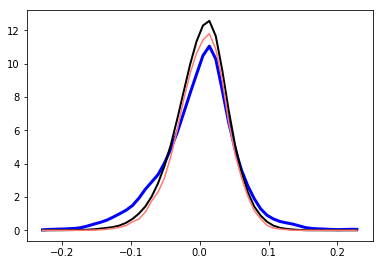

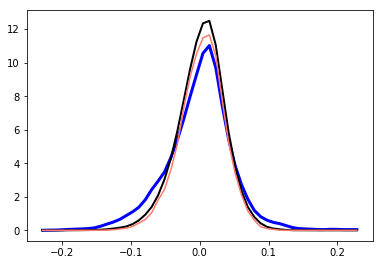

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import xarray as xr
import os
import pandas as pd
import glob

def compare_histograms(X_model,X_obs,no_ens,no_bins):
    s1,s2 = X_model.shape
    
    if s1 == no_ens:
        X_model = np.transpose(X_model)
        
    KDE_model = np.array([])
    for iens in np.arange(0,no_ens):
        ikde = stats.gaussian_kde(X_model.iloc[:,iens])
        bin_lims = np.amax((abs(np.amin(np.amin(X_model,axis=0))),
                        abs(np.amax(np.amax(X_model,axis=0)))))
        ind = np.linspace(-bin_lims,bin_lims,no_bins)
        kde_eval = ikde.evaluate(ind)
        if iens == 0:
            KDE_model = kde_eval
        else:
            KDE_model = np.vstack((KDE_model,kde_eval))
        
    kde_obs = stats.gaussian_kde(X_obs)
    obs_eval = kde_obs.evaluate(ind)
    return obs_eval,KDE_model,ind
    fig = plt.figure()
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    ax.fill_between(ind,np.amin(KDE_model,axis=0)/len(X_model),
       np.amax(KDE_model,axis=0)/len(X_model),linewidth=2,
       color='xkcd:salmon',alpha=0.5)
    #ax.plot(ind,np.amax(KDE_model,axis=0)/len(ind),linewidth=2,color='xkcd:salmon')
    ax.plot(ind,np.nanmean(KDE_model,axis=0)/len(X_model),'k',linewidth=2.2)
    ax.plot(ind,obs_eval/len(X_obs),'b',linewidth=3)
    ax.set_xlabel('Change in SIC (10^6 km^2)',fontsize=14)
    ax.set_ylabel('Frequency',fontsize=14)
        


model_name = 'ecmwfsipn'
model_type = 'reforecast'
select_ind = [0,6,7,14,15,16,17]
region_names = pd.read_csv('/home/disk/sipn/mcmcgraw/python/NSIDC_region_names.txt')
region_select = region_names.iloc[select_ind,1]
print(region_select)
filepath = '/home/disk/sipn/mcmcgraw/python/data_VRILEs/text_files/MODELS/{model_name}/{model_type}/'.format(model_name=model_name,model_type=model_type)
filenames = glob.glob(filepath+'RAW*.csv')

#for ifile in np.arange(0,len(filenames)):
ifile = 1
print(filenames[ifile])
i_file = filenames[ifile]
i_data = pd.read_csv(i_file)
no_time = len(np.transpose(i_data))
i_data = i_data.iloc[:,26:no_time]           
        
obs_fpath = '/home/disk/sipn/mcmcgraw/python/data_VRILEs/text_files/OBS'
fname_test = glob.glob(obs_fpath+'/NSIDC_SIE_delta*_JJAS_NO_dt.txt')
print(fname_test[11])
obs_read = pd.read_csv(fname_test[11])
obs_read = pd.DataFrame(obs_read.replace([np.inf,-np.inf],np.nan))
obs_read.fillna(method='ffill')
obs_read.fillna(method='bfill')
obs_read = obs_read.iloc[:,0] 
no_ens = 25
no_bins = 50
bins = np.linspace(-0.2,0.2,50)
O_kde = stats.gaussian_kde(obs_read)
O_plot = O_kde.evaluate(bins)
for i in np.arange(0,no_ens):
    M_ikd = i_data.iloc[i,:]
    M_est = stats.gaussian_kde(M_ikd)
    M_plot = M_est.evaluate(bins)
    if i == 0:
        M_all = M_est
        M_all_plot = M_plot
    else:
        M_all = np.vstack((M_all,M_est))
        M_all_plot = np.vstack((M_all_plot,M_plot))
    
obs_eval,model_eval,bins = compare_histograms(i_data,obs_read,no_ens,no_bins)
# print(bins)
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(bins,O_plot,'b',linewidth=3)
ax.plot(bins,np.nanmean(M_all_plot,axis=0),'k',linewidth=2)
ax.plot(bins,np.amin(M_all_plot,axis=0),'xkcd:salmon')
# ax.plot(bins,np.nanmean(model_eval,axis=0),'k',linewidth=2)
# #ax.plot(bins,np.amax(model_eval,axis=0),'xkcd:salmon')

fig2 = plt.figure()
ax2 = fig2.add_axes([0.1,0.1,0.8,0.8])
ax2.plot(bins,obs_eval,'b',linewidth=3)
ax2.plot(bins,np.nanmean(model_eval,axis=0),'k',linewidth=2)
ax2.plot(bins,np.amin(model_eval,axis=0),'xkcd:salmon')

In [47]:
print(np.transpose(model_eval))

[[0.00000000e+000 8.26279854e-222 1.31934916e-197 ... 9.50977588e-059
  8.63511138e-036 8.95668924e-042]
 [0.00000000e+000 1.87714830e-202 1.15008781e-180 ... 3.68628470e-053
  5.95138636e-032 2.11427646e-037]
 [0.00000000e+000 5.55542689e-184 1.73944379e-164 ... 7.49998637e-048
  2.45949629e-028 2.84540095e-033]
 ...
 [0.00000000e+000 7.25987812e-169 3.95059972e-134 ... 3.67453281e-054
  3.66327747e-040 2.12655655e-047]
 [0.00000000e+000 1.40543363e-186 8.97920443e-149 ... 8.80777914e-060
  1.83918115e-044 2.65133497e-052]
 [0.00000000e+000 3.54436783e-205 3.54095849e-164 ... 1.10849175e-065
  5.53700328e-049 1.88353044e-057]]


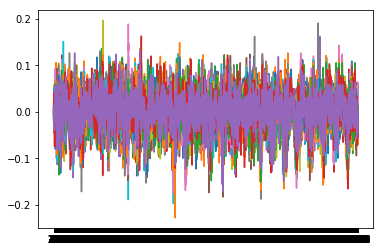

In [46]:
plt.plot(np.transpose(i_data))